In [1]:
using LinearAlgebra, FFMPEG,FFTW, Plots;gr();default(size=(300,200))

In [2]:
# Define the dataset Y
Nx = 401
x = range(-2,2,length=Nx) #  spatial coordinate (dx = 0.01)

Nt = 1001
t = range(0,10,length=Nt) # time (dt = 0.01)

A1 = 1.
x01 = 0.5
σ1 = 0.4

A2 = 2.
x02 = -1.
σ2 = 0.2

f1 = 1.
f2 = 4.

#gaussian processes
y1 = A1*exp.(-((x.-x01).^2)/(2*σ1^2))
y2 = A2*exp.(-((x.-x02).^2)/(2*σ2^2));

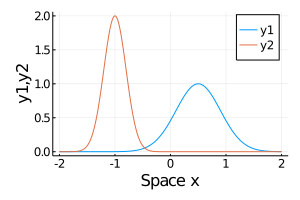

In [3]:
# plot of the two spatial bumps
plot(x,y1)
plot!(x,y2,xlabel="Space x",ylabel="y1,y2")

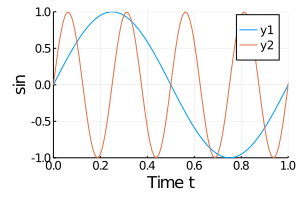

In [4]:
# plot of the two temporal dynamics
plot(t,sin.(2*π*f1*t))
plot!(t,sin.(2*π*f2*t),xlabel="Time t",ylabel="sin",xlim=(0,1),ylim=(-1,1))

In [5]:
#  Building the discrete spatio-temporal series Y 
#Build of the spatio-temporal x vs t data matrix Y
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1*sin(2*π*f1*tt) + y2*sin(2*π*f2*tt) # gaussian processes 
    j+=1                                           # with their temporal dynamics
end
Y

401×1001 Array{Float64,2}:
 0.0  1.85377e-6   3.59107e-6   5.10276e-6   …  -1.85377e-6   -7.30294e-20
 0.0  2.37729e-6   4.60522e-6   6.54381e-6      -2.37729e-6   -9.36536e-20
 0.0  3.04105e-6   5.89103e-6   8.37089e-6      -3.04105e-6   -1.19802e-19
 0.0  3.88042e-6   7.51704e-6   1.06814e-5      -3.88042e-6   -1.5287e-19
 0.0  4.93912e-6   9.56792e-6   1.35956e-5      -4.93912e-6   -1.94577e-19
 0.0  6.27097e-6   1.21479e-5   1.72617e-5   …  -6.27097e-6   -2.47045e-19
 0.0  7.94208e-6   1.53852e-5   2.18616e-5      -7.94208e-6   -3.12879e-19
 0.0  1.00334e-5   1.94364e-5   2.76182e-5      -1.00334e-5   -3.95267e-19
 0.0  1.26438e-5   2.44931e-5   3.48036e-5      -1.26438e-5   -4.98103e-19
 0.0  1.58935e-5   3.07884e-5   4.37489e-5      -1.58935e-5   -6.26127e-19
 0.0  1.99286e-5   3.86051e-5   5.4856e-5    …  -1.99286e-5   -7.85091e-19
 0.0  2.49258e-5   4.82855e-5   6.86114e-5      -2.49258e-5   -9.81955e-19
 0.0  3.10982e-5   6.02425e-5   8.56017e-5      -3.10982e-5   -1.22512e-18

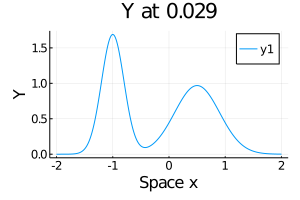

In [6]:
# Plot a discrete at t=(30-1)*0.01
plot(x,Y[:,30],title="Y at 0.029",xlabel="Space x",ylabel="Y")

In [8]:
#  Building the two dimensional continous function f(x,t)
f(x,t)=A1*exp.(-((x.-x01).^2)/(2*σ1^2))sin(2*π*f1*t)+ A2*exp.(-((x.-x02).^2)/(2*σ2^2))sin(2*π*f2*t)

f (generic function with 1 method)

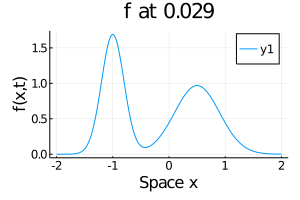

In [9]:
# Plot a contnious signal at t=29*0.01
plot(x,f(x,29*0.01),title="f at 0.029",xlabel="Space x",ylabel="f(x,t)")

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_1_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_1_fps15.gif")
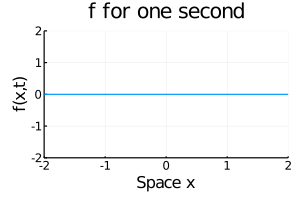

In [10]:
# 1D Animation over the first second
anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x, f(x,tt),xlim=(-2,2),title="f for one second",leg=false,ylim=(-2.,2.),xlabel="Space x",ylabel="f(x,t)")
    Plots.frame(anim)
end
gif(anim, "anim_1_fps15.gif", fps = 15)

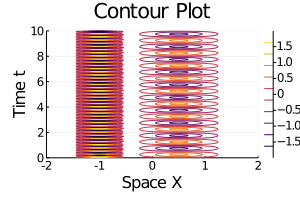

In [11]:
# 2D Contour Plot of the data matrix Y
contour(x,t,f,levels=10)
xlabel!("Space X")
ylabel!("Time t")
title!("Contour Plot")

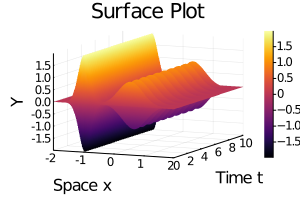

In [12]:
# 3D Surface Plot of the dataset
#my_cg = cgrad([:blue, :yellow])
surface(collect(x),collect(t),f, xaxis="Space x", yaxis="Time t",zaxis="Y", title="Surface Plot")

In [13]:
# another way to create the data matrix Y (like meshgrid matlab function )
X = repeat(reshape(x, :, 1), 1,length(t))
T = repeat(reshape(t,1,:),  length(x),1)
YY = map(f, X, T);

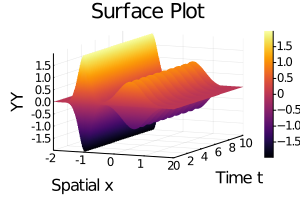

In [14]:
surface(X[:,1],T[1,:],YY', xaxis="Spatial x", yaxis="Time t",zaxis="YY", title="Surface Plot")

In [ ]:
#Interactive Plot 
using PlotlyJS;
trace=PlotlyJS.surface(x=x,y=t,z=Y, xlabel="Space X",colorscale="Viridis")
layout=PlotlyJS.Layout(title="Interactive Plot")
PlotlyJS.plot(trace,layout)

In [15]:
# Data decomposition with the singular value decomposition 
# U matrix (spatail Correlations); σ matrix (weighting of projections), Vt (time dynamics) 
Z=svd(Y)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
401×401 Array{Float64,2}:
 -6.25908e-7  -3.64692e-9   -2.45616e-6  …   0.0151036    -5.62259e-6
 -8.02678e-7  -4.72135e-9   -5.62085e-6     -0.86753      -7.88489e-6
 -1.0268e-6   -6.09048e-9   -2.21466e-6     -0.359183     -8.74395e-6
 -1.31022e-6  -7.82967e-9   -6.04811e-6     -0.165133     -1.2568e-5
 -1.6677e-6   -1.00322e-8   -4.02473e-6      0.252926     -1.58282e-5
 -2.11742e-6  -1.28129e-8   -5.87807e-6  …   0.140434     -2.06971e-5
 -2.68169e-6  -1.63134e-8   -7.96009e-6     -0.0445651    -2.45388e-5
 -3.38786e-6  -2.07069e-8   -4.00358e-7      0.0576514    -3.04786e-5
 -4.26929e-6  -2.62054e-8    8.14118e-7      0.0352011    -3.84182e-5
 -5.36661e-6  -3.30668e-8   -2.76331e-5      0.00313514   -4.87542e-5
 -6.72914e-6  -4.16048e-8   -3.30004e-5  …   0.00949234   -6.16538e-5
 -8.41653e-6  -5.2199e-8    -3.61258e-5     -0.00225977   -7.68176e-5
 -1.05008e-5  -6.53079e-8   -2.73605e-5     -0.00559725   -9.26522e-5
  ⋮              

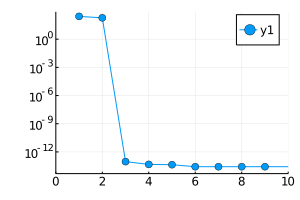

In [16]:
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics) =#
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

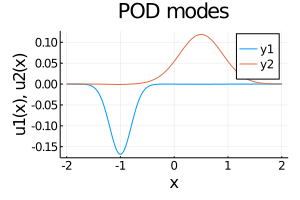

In [17]:
#= Plot of the POD modes (Uj ; j={1,2})The POD modes are not so physical, 
a kind of blending of the bumps occurs due to the greedy nature of the SVD algorithm =#
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes")

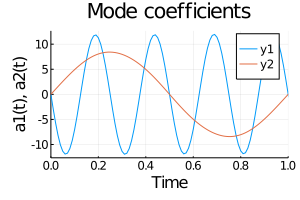

In [18]:
#plot of the Mode coefficents (σjVtj ; j={1,2]})
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 1))
plot!(t,Z.S[2]*Z.Vt[2,:],xlim=(0, 1))
xlabel!("Time");ylabel!("a1(t), a2(t)");title!("Mode coefficients")

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_3_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_3_fps15.gif")
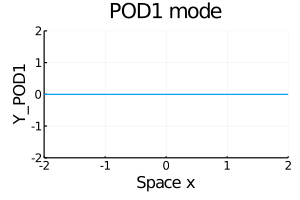

In [19]:
#Animation of the POD1 mode over the first second
Y_POD1=Z.U[:,1]*Z.S[1]*Z.Vt[1,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD1[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD1 mode",xlabel="Space x",ylabel="Y_POD1")
    Plots.frame(anim)
    j+=1
end
gif(anim, "anim_3_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_4_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_4_fps15.gif")
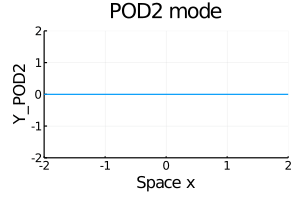

In [20]:
#Animation of the POD2 mode over the first second
Y_POD2=Z.U[:,2]*Z.S[2]*Z.Vt[2,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD2[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD2 mode",xlabel="Space x",ylabel="Y_POD2")
    Plots.frame(anim)
    j+=1
end
gif(anim, "anim_4_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_2_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_2_fps15.gif")
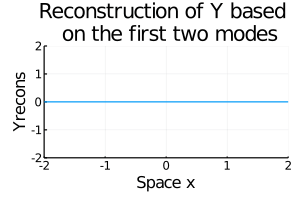

In [21]:
#Animation of Yrecons = Y_POD1+YPOD2 over the firt second
Yrecons=Y_POD1+Y_POD2
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Yrecons[:,j],xlim=(-2,2),leg=false,ylim=(-2.,2.),title="Reconstruction of Y based \n on the first two modes",xlabel="Space x",ylabel="Yrecons")
    Plots.frame(anim)
    j+=1
end
gif(anim, "anim_2_fps15.gif", fps = 15)

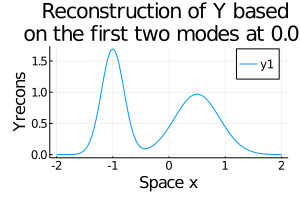

In [22]:
plot(x,Yrecons[:,30],title="Reconstruction of Y based \n on the first two modes at 0.029",xlabel="Space x",ylabel="Yrecons")

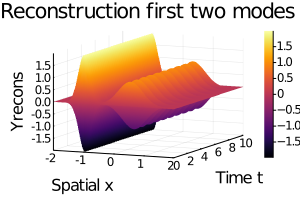

In [23]:
plot(x,t,Yrecons',st=:surface,xaxis="Spatial x", yaxis="Time t",zaxis="Yrecons")
title!("Reconstruction first two modes")

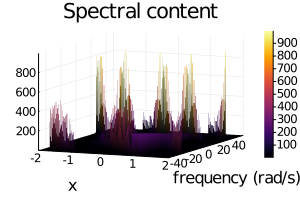

In [24]:
# Run spectral POD (which here is just a Fourier Transform, as the data is deterministic)
# Note that this requires sufficient resolution in time, and enough snapshots
#Initialiaze
Yft=Array{Complex{Float64},2}(undef,Nx,Nt)
for j in 1:Nx
    Yft[j,:] = fft(Y[j,:])
end

Yft
dt=0.01 #time step
freq = fftfreq(length(collect(t)),1.0/dt)

maximum(freq)

plot(x,freq,abs.(Yft),st=:surface)
xlabel!("x")
ylabel!("frequency (rad/s)")
title!("Spectral content")

In [25]:
A1 = 1.
x01 = 0.25
σ1 = 0.2

A2 = 1.5
x02 = -0.25
σ2 = 0.2

f1 = 1.
f2 = 4.
#gaussian processes
y1 = A1*exp.(-((x.-x01).^2)/(2*σ1^2))
y2 = A2*exp.(-((x.-x02).^2)/(2*σ2^2));

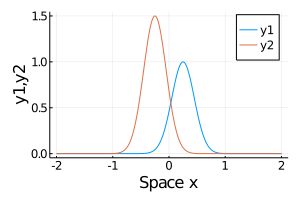

In [26]:
plot(x,y1)
plot!(x,y2,xlabel="Space x",ylabel="y1,y2")

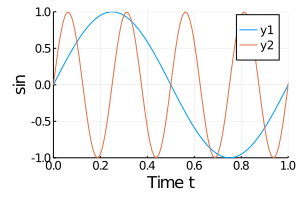

In [27]:
plot(t,sin.(2*π*f1*t))
plot!(t,sin.(2*π*f2*t),xlabel="Time t",ylabel="sin",xlim=(0,1),ylim=(-1,1))

In [28]:
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1*sin(2*π*f1*tt) + y2*sin(2*π*f2*tt) # gaussian processes 
    j+=1                                           # with their temporal dynamics
end

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_5_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_5_fps15.gif")
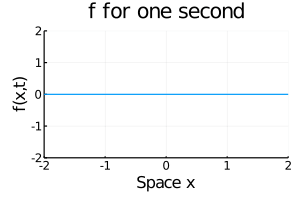

In [29]:
#Animation over the first second
anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x, f(x,tt),xlim=(-2,2),title="f for one second",leg=false,ylim=(-2.,2.),xlabel="Space x",ylabel="f(x,t)")
    Plots.frame(anim)
end
gif(anim, "anim_5_fps15.gif", fps = 15)

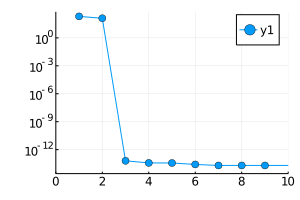

In [30]:
# Data decomposition with the singular value decomposition 
# U matrix (spatail Correlations); σ matrix (weighting of projections), Vt (time dynamics) 
Z=svd(Y)
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics) =#
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

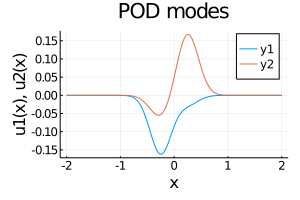

In [31]:
#= Plot of the POD modes (Uj ; j={1,2})The POD modes are not so physical, 
a kind of blending of the bumps occurs due to the greedy nature of the SVD algorithm =#
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes")

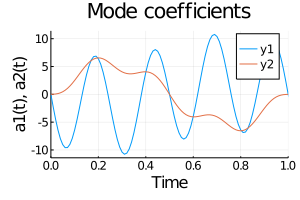

In [32]:
#plot of the Mode coefficents (σjVtj ; j={1,2]})
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 1))
plot!(t,Z.S[2]*Z.Vt[2,:],xlim=(0, 1))
xlabel!("Time");ylabel!("a1(t), a2(t)");title!("Mode coefficients")

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_6_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_6_fps15.gif")
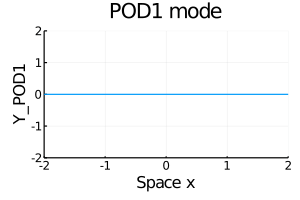

In [33]:
#Animation of the POD1 mode over the first second
Y_POD1=Z.U[:,1]*Z.S[1]*Z.Vt[1,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD1[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD1 mode",xlabel="Space x",ylabel="Y_POD1")
    Plots.frame(anim)
    j+=1
end
gif(anim, "anim_6_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_7_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_7_fps15.gif")
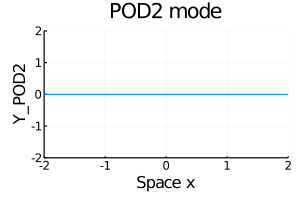

In [34]:
#Animation of the POD2 mode over the first second
Y_POD2=Z.U[:,2]*Z.S[2]*Z.Vt[2,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD2[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD2 mode",xlabel="Space x",ylabel="Y_POD2")
    Plots.frame(anim)
    j+=1
end
gif(anim, "anim_7_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = C:\Users\Admin\OneDrive\Documents\Julia\ROM4SM\anim_8_fps15.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\Admin\\OneDrive\\Documents\\Julia\\ROM4SM\\anim_8_fps15.gif")
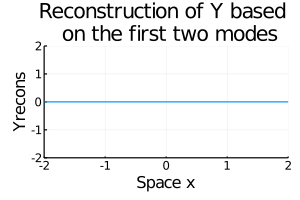

In [35]:
#Animation of Yrecons = Y_POD1+YPOD2 over the firt second
Yrecons=Y_POD1+Y_POD2
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Yrecons[:,j],xlim=(-2,2),leg=false,ylim=(-2.,2.),title="Reconstruction of Y based \n on the first two modes",xlabel="Space x",ylabel="Yrecons")
    Plots.frame(anim)
    j+=1
end
gif(anim, "anim_8_fps15.gif", fps = 15)

In [ ]:
#What if Dynamic mode decomposition?
using DataDrivenDiffEq
D=DMD(Y)
#convert(Float64,D)
#show(stdout,"text/plain", round.({Float64}D;digits=2))